In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X,y = mnist.data, mnist.target
X.shape

(70000, 784)

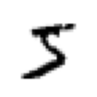

In [11]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plt.figure(figsize=(1,1))
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [12]:
y[0]

'5'

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [22]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

In [18]:
print(X_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(y_train)

['5' '0' '4' ... '5' '6' '8']


In [21]:
y_train_5

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [28]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [29]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [32]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
print(y_scores)

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
print(precisions)
print(recalls)
print(thresholds)

[0.09035    0.09035151 0.09035301 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]
[-146348.56726174 -142300.00705404 -137588.97581744 ...   38871.26391927
   42216.05562787   49441.43765905]


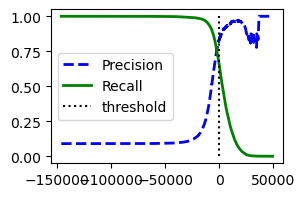

In [45]:
plt.figure(figsize=(3, 2))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(0, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()

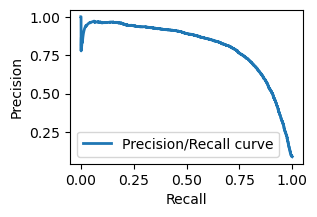

In [49]:
plt.figure(figsize=(3,2))
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [50]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.019499143955)

In [54]:
from sklearn.metrics import precision_score

y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [56]:
from sklearn.metrics import recall_score

recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [57]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ]
[0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00]
[             inf   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


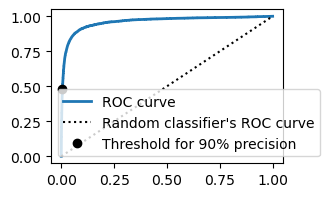

In [59]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(3,2))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [61]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [62]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [63]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [64]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

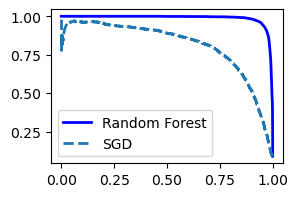

In [66]:
plt.figure(figsize=(3,2))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")
plt.legend()
plt.show()

# SGDClassifier (Stochastic Gradient Descent)
# -> want to separate apples and oranges on a table
# -> draw a straight line between them so all apples on one side, and all oranges on the other
# -> The line is decision boundary
# -> tries to find the best straight line to separate the two types of fruit
# -> looks at each fruit, one at a time (or a few at a time), and slightly moves the line to better separate apples from oranges
# -> it keeps doing this over and over, until the line works well

# Random Forest
# -> ask many friends (each friend is a tree) to decide if a fruit is an apple or orange
# -> Each friend looks at different things: color, size, shape
# -> Each friend makes their own guess
# -> take a vote and go with the majority answer

In [70]:
from sklearn.metrics import f1_score

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [72]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [73]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [74]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [75]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [77]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


In [78]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [79]:
len(ovr_clf.estimators_)

10